In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sao filipe cv
lebu cl
ati td
takaka nz
punta arenas cl
belushya guba ru
provideniya ru
hobart au
albany au
kaitangata nz
east london za
san quintin mx
verkh-suetka ru
ushuaia ar
beringovskiy ru
kahului us
rikitea pf
marawi sd
touros br
saint-philippe re
albany au
mogadishu so
rikitea pf
barrow us
albany au
barrow us
castro cl
torit sd
puerto el triunfo sv
cayenne gf
albany au
vaini to
jamestown sh
toila ee
yellowknife ca
vaini to
matay eg
rikitea pf
karratha au
illoqqortoormiut gl
bredasdorp za
toulepleu ci
mokhsogollokh ru
saldanha za
arraial do cabo br
zamora es
port alfred za
victoria sc
roma au
salinopolis br
hobart au
new norfolk au
sao joao do piaui br
port alfred za
hilo us
jiazi cn
ipoti ng
teknaf bd
pevek ru
khatanga ru
mataura pf
lompoc us
bluff nz
bluff nz
port alfred za
kruisfontein za
lorengau pg
mataura pf
nanortalik gl
mataura pf
bredasdorp za
tasiilaq gl
rikitea pf
richards bay za
homer us
cape town za
san felipe mx
mahebourg mu
middleton ca
mehran ir
cefalu it
dikson r

port alfred za
jamestown sh
comodoro rivadavia ar
luderitz na
takoradi gh
barrow us
portland au
kailua us
batagay-alyta ru
mataura pf
porto novo cv
marrakesh ma
ushuaia ar
rikitea pf
kigoma tz
male mv
baruun-urt mn
thompson ca
ushuaia ar
busselton au
busselton au
barbar sd
punta arenas cl
hermanus za
norman wells ca
cidreira br
puerto ayora ec
constitucion mx
margherita in
sentyabrskiy ru
mataura pf
punta arenas cl
ushuaia ar
dakoro ne
atuona pf
belyy yar ru
khatanga ru
fairbanks us
bandarbeyla so
constitucion mx
popondetta pg
suntar ru
mahebourg mu
the valley ai
berlevag no
cabo san lucas mx
tasiilaq gl
ambilobe mg
saint-philippe re
bikin ru
rio grande br
georgetown sh
ushuaia ar
kapit my
saint-ambroise ca
hithadhoo mv
arraial do cabo br
belushya guba ru
ushuaia ar
buta cd
mmathubudukwane bw
punta arenas cl
taolanaro mg
sao filipe cv
bluff nz
bredasdorp za
camana pe
punta arenas cl
illoqqortoormiut gl
ushuaia ar
butaritari ki
hermanus za
saint-philippe re
illoqqortoormiut gl
bandarbey

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | ati
Processing Record 4 of Set 1 | takaka
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | san quintin
Processing Record 13 of Set 1 | verkh-suetka
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | beringovskiy
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | marawi
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | mogadishu
Processing Record 22 of Set 1 | barrow
Proces

Processing Record 38 of Set 4 | trairi
Processing Record 39 of Set 4 | lund
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | caxias
Processing Record 44 of Set 4 | nuuk
Processing Record 45 of Set 4 | kupang
Processing Record 46 of Set 4 | bagn
Processing Record 47 of Set 4 | buin
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | ulaangom
Processing Record 50 of Set 4 | bac lieu
Processing Record 1 of Set 5 | mayo
Processing Record 2 of Set 5 | krotovka
Processing Record 3 of Set 5 | isla mujeres
Processing Record 4 of Set 5 | kaeo
Processing Record 5 of Set 5 | sorland
Processing Record 6 of Set 5 | nykoping
Processing Record 7 of Set 5 | pemba
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | leningradskiy
Processing Record 10 of Set 5 | naze
Processing Record 11 of Set 5 | constitucion
Processing Recor

Processing Record 28 of Set 8 | margherita
Processing Record 29 of Set 8 | dakoro
Processing Record 30 of Set 8 | belyy yar
Processing Record 31 of Set 8 | fairbanks
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | popondetta
Processing Record 34 of Set 8 | suntar
Processing Record 35 of Set 8 | bikin
Processing Record 36 of Set 8 | rio grande
Processing Record 37 of Set 8 | kapit
Processing Record 38 of Set 8 | saint-ambroise
Processing Record 39 of Set 8 | buta
Processing Record 40 of Set 8 | mmathubudukwane
Processing Record 41 of Set 8 | jutai
Processing Record 42 of Set 8 | ardabil
Processing Record 43 of Set 8 | santa maria
Processing Record 44 of Set 8 | bustonkala
City not found. Skipping...
Processing Record 45 of Set 8 | saleaula
City not found. Skipping...
Processing Record 46 of Set 8 | zhigansk
Processing Record 47 of Set 8 | labuhan
Processing Record 48 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 8 | svobodnyy
P

Processing Record 16 of Set 12 | phan rang
City not found. Skipping...
Processing Record 17 of Set 12 | changli
Processing Record 18 of Set 12 | dovers
Processing Record 19 of Set 12 | tsiroanomandidy
Processing Record 20 of Set 12 | amazar
Processing Record 21 of Set 12 | calabar
Processing Record 22 of Set 12 | sinnamary
Processing Record 23 of Set 12 | el alto
Processing Record 24 of Set 12 | victor harbor
Processing Record 25 of Set 12 | levokumka
Processing Record 26 of Set 12 | faya
Processing Record 27 of Set 12 | shaunavon
Processing Record 28 of Set 12 | pucallpa
Processing Record 29 of Set 12 | opuwo
Processing Record 30 of Set 12 | aire-sur-la-lys
Processing Record 31 of Set 12 | dunedin
Processing Record 32 of Set 12 | namatanai
Processing Record 33 of Set 12 | killybegs
Processing Record 34 of Set 12 | porto belo
Processing Record 35 of Set 12 | maceio
Processing Record 36 of Set 12 | cape coast
Processing Record 37 of Set 12 | elat
Processing Record 38 of Set 12 | louisbo

In [15]:
# Get the number of cities 
len(city_data)

574

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,74.17,80,11,8.79,CV,2021-07-28 01:45:01
1,Lebu,-37.6167,-73.6500,45.86,80,0,21.88,CL,2021-07-28 01:45:04
2,Ati,13.2154,18.3353,74.50,87,100,7.81,TD,2021-07-28 01:45:04
3,Takaka,-40.8500,172.8000,60.39,59,57,0.74,NZ,2021-07-28 01:45:05
4,Punta Arenas,-53.1500,-70.9167,44.71,81,75,23.02,CL,2021-07-28 01:43:22
5,Provideniya,64.3833,-173.3000,50.11,81,90,8.95,RU,2021-07-28 01:45:06
6,Hobart,-42.8794,147.3294,57.25,64,90,4.00,AU,2021-07-28 01:42:36
7,Albany,42.6001,-73.9662,67.75,92,100,2.04,US,2021-07-28 01:45:06
8,Kaitangata,-46.2817,169.8464,54.93,51,92,1.28,NZ,2021-07-28 01:45:07
9,East London,-33.0153,27.9116,64.80,78,1,14.70,ZA,2021-07-28 01:45:07


In [21]:
# Rearrange the column order 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new (or same) df to new order 
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-07-28 01:45:01,14.8961,-24.4956,74.17,80,11,8.79
1,Lebu,CL,2021-07-28 01:45:04,-37.6167,-73.6500,45.86,80,0,21.88
2,Ati,TD,2021-07-28 01:45:04,13.2154,18.3353,74.50,87,100,7.81
3,Takaka,NZ,2021-07-28 01:45:05,-40.8500,172.8000,60.39,59,57,0.74
4,Punta Arenas,CL,2021-07-28 01:43:22,-53.1500,-70.9167,44.71,81,75,23.02


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

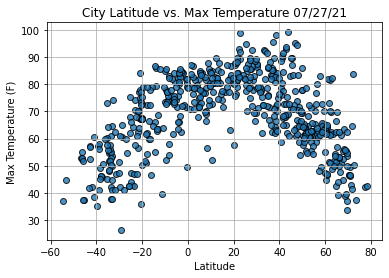

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

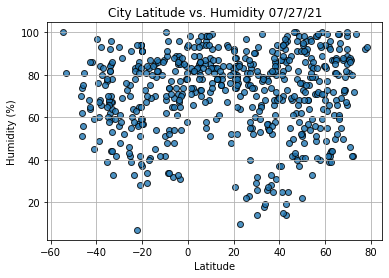

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

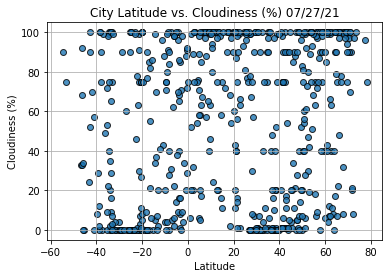

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()